In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data
df = pd.read_csv('salary_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#Step 2 Performing EDA on Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#checking Null Values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
#Checking duplicates
df[df.duplicated()].shape

(0, 2)

In [7]:
df[df.duplicated()]

,YearsExperience,Salary


In [8]:
#Rename the coloumn Names
data = df.rename({'YearsExperience':'yearexp'},axis=1)
data = data.rename({'Salary':'sal'},axis=1)


<Axes: xlabel='yearexp', ylabel='Density'>

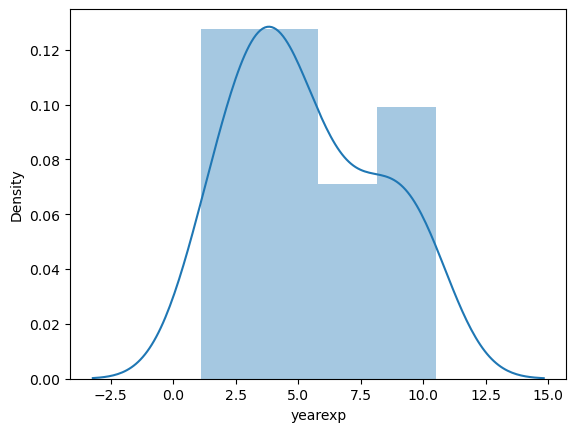

In [9]:
sns.distplot(data['yearexp'])

<Axes: xlabel='sal', ylabel='Density'>

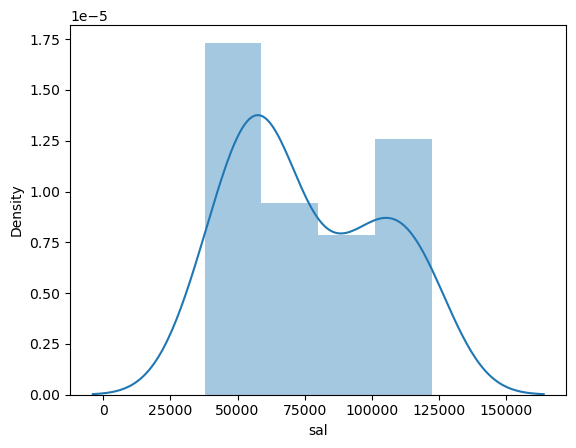

In [10]:
sns.distplot(data['sal'])

<Axes: >

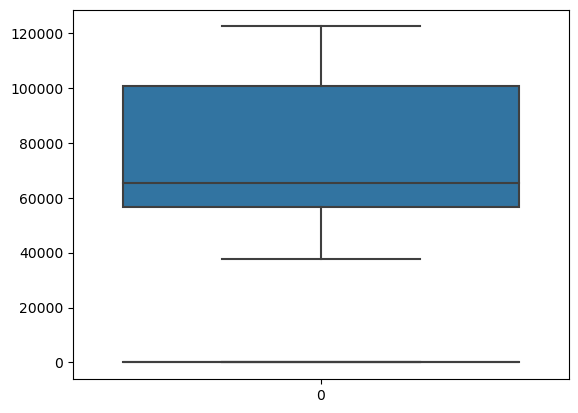

In [11]:
#Plotting the data to find out whether outliers are present
sns.boxplot(data['sal'])
sns.boxplot(data['yearexp'])

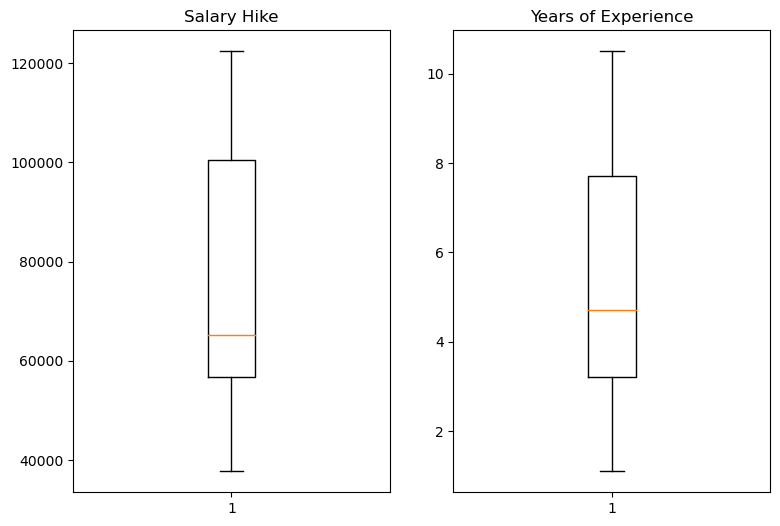

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

#There are no outliers in the dataset

In [13]:
#Checking the correlation between variables
data.corr()

,yearexp,sal
yearexp,1.000000,0.978242
sal,0.978242,1.000000


#The correlation value is good > 0.95

## Visualization of Correlation beteen x and y by regression plot

<Axes: xlabel='yearexp', ylabel='sal'>

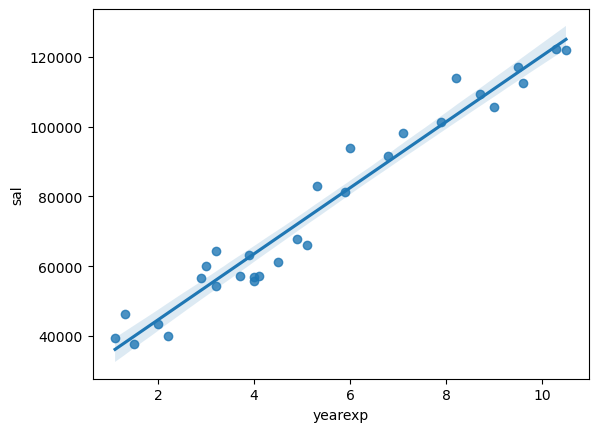

In [14]:
sns.regplot(x=data["yearexp"] , y=data["sal"])

#There is good correlation between the two variable

In [15]:
#Model Building

model=smf.ols("sal~yearexp",data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        18:56:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yearexp     9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#The R-squared and Adjusted R-squared scores are above 0.85.
#It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction

In [16]:
model.params

Intercept    25792.200199
yearexp       9449.962321
dtype: float64

## Trying different transformation of data to estimate normal distribution and remove any skewness


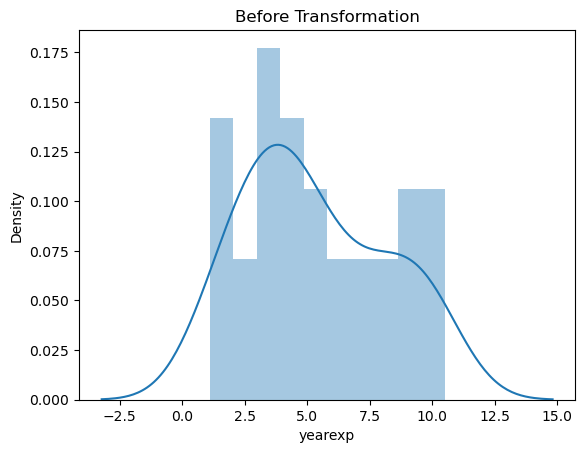

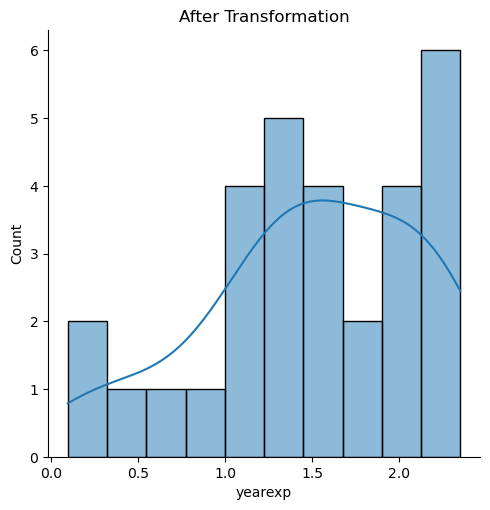

In [18]:
sns.distplot(data['yearexp'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['yearexp']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

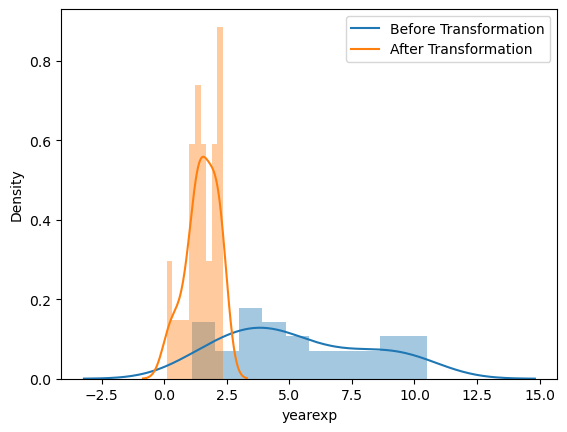

In [20]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['yearexp'], bins = 10, kde = True)
sns.distplot(np.log(data['yearexp']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

## Checking Normality and skewness with QQ plot for various data transformations

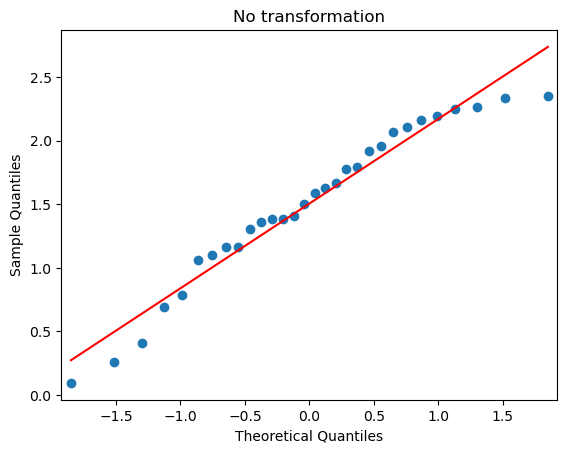

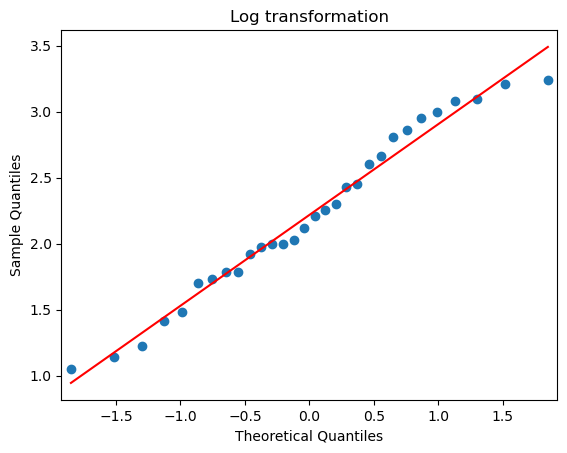

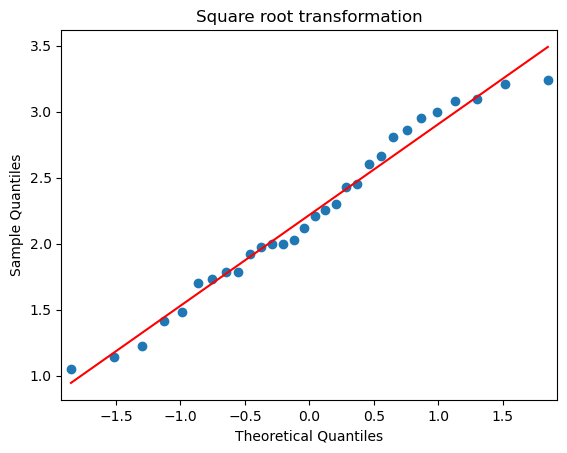

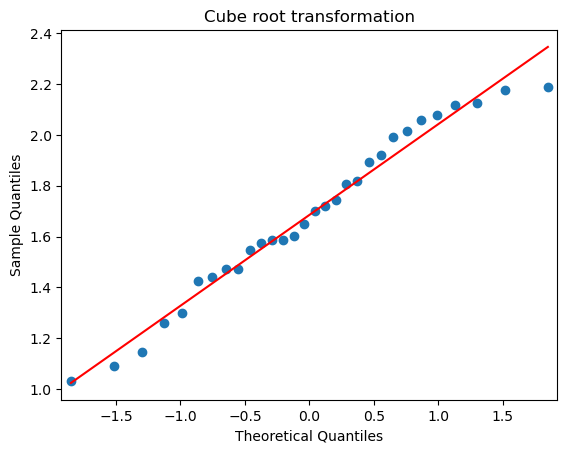

In [23]:
sm.qqplot(np.log(data['yearexp']), line = 'r')
plt.title('No transformation')
sm.qqplot(np.sqrt(data['yearexp']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['yearexp']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['yearexp']), line = 'r')
plt.title('Cube root transformation')
plt.show()

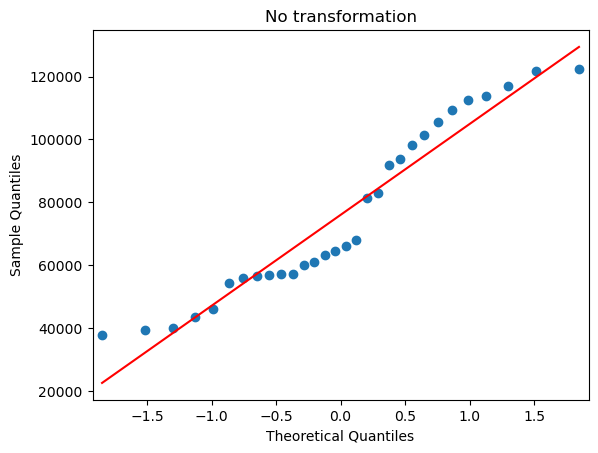

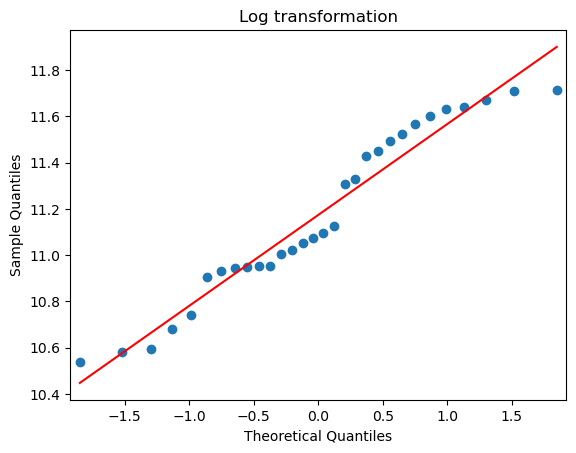

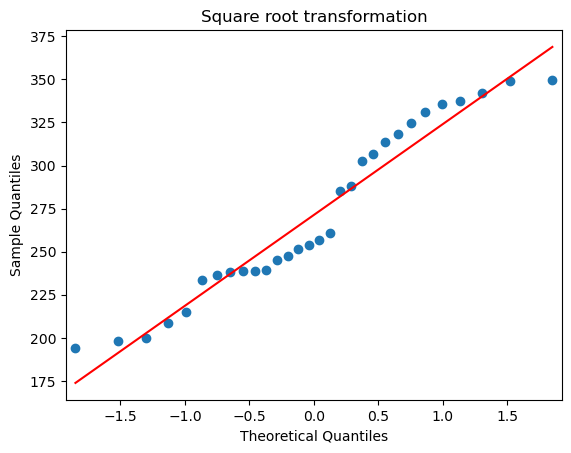

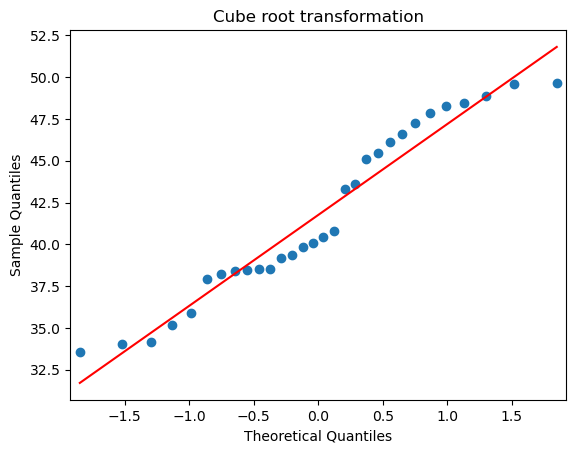

In [26]:
sm.qqplot(data['sal'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['sal']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['sal']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['sal']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [28]:
#Square Root Transformation
model1 = smf.ols('np.sqrt(sal)~np.sqrt(yearexp)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.sqrt(sal)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.58e-19
Time:                        19:07:07   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(yearexp)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2 = smf.ols('np.cbrt(sal)~np.cbrt(yearexp)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.cbrt(sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           6.37e-18
Time:                        19:08:10   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(yearexp)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model3 = smf.ols('np.log(sal)~np.log(yearexp)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.40e-16
Time:                        19:08:59   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
np.log(yearexp)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(model.rsquared , model1.rsquared ,model2.rsquared ,model3.rsquared)
max(model.rsquared , model1.rsquared ,model2.rsquared ,model3.rsquared)



0.9569566641435086 0.9419490138976825 0.9324434036761005 0.9052150725817149


0.9569566641435086

#The model rsquared and adjusted rsquared values are better than the performed transformation models

In [46]:
# model results without any transformation
predicted =pd.DataFrame()
predicted['YearsExperience'] = data['yearexp']
predicted['Salary'] = data['sal']
predicted['Predicted_Salary_Hike']= model.predict((data['yearexp']))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


## Model Testing

In [49]:
#Model coefficients
model.params

Intercept    25792.200199
yearexp       9449.962321
dtype: float64

In [51]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept    11.346940
 yearexp      24.950094
 dtype: float64,
 Intercept    5.511950e-12
 yearexp      1.143068e-20
 dtype: float64)

In [54]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Predictions

In [55]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [56]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5,7])
new_data

0    3
1    5
2    7
dtype: int64

In [57]:
data_pred=pd.DataFrame(new_data,columns=['yearexp'])
data_pred

,yearexp
0,3
1,5
2,7


In [58]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
2    91941.936449
dtype: float64

In [ ]:
#Thank You